In [1]:
# HW5 Solution
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('accident.csv')
df

,PassengerId,Survived,class,Name,Sex,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,8.0500
...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,30.0000


In [2]:
#change sex to a numerical value
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])
print(df['Sex'].unique())

[1 0]


In [3]:
df.head(3)

,PassengerId,Survived,class,Name,Sex,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,7.9250


KNN Steps 1-6

In [4]:
# 1. arrange data into features & target arrays
X = df.iloc[:,[2,4,5]]
y = df.iloc[:,1] 

print(X)
print(y)

     class  Sex     Fare
0        3    1   7.2500
1        1    0  71.2833
2        3    0   7.9250
3        1    0  53.1000
4        3    1   8.0500
..     ...  ...      ...
886      2    1  13.0000
887      1    0  30.0000
888      3    0  23.4500
889      1    1  30.0000
890      3    1   7.7500

[891 rows x 3 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [5]:
# 2. Split data into a training set and test set
#    Splitting data into 70% training and 30% test data:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

print(X_train.shape)
print(X_test.shape)
print(X_train)

Labels count in y: [549 342]
Labels count in y_train: [384 239]
Labels count in y_test: [165 103]
(623, 3)
(268, 3)
     class  Sex     Fare
472      2    0  27.7500
597      3    1   0.0000
843      3    1   6.4375
112      3    1   8.0500
869      3    1  11.1333
..     ...  ...      ...
650      3    1   7.8958
241      3    0  15.5000
265      2    1  10.5000
15       2    0  16.0000
464      3    1   8.0500

[623 rows x 3 columns]


In [6]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(X_train_std.shape)
print(X_test_std.shape)

(623, 3)
(268, 3)


In [7]:
# 3. Select the ML algorithm, and its parameteters
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, # Take the Sqrt() of the number of observations
                           p=2, 
                           metric='minkowski')
knn

KNeighborsClassifier()

In [8]:
# 4. Build the model (.fit)
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [9]:
# 5. Apply the model to the test data (.predict)
# 6. Estimate performance (accuracy score)
from sklearn import metrics 
y_pred = knn.predict(X_test_std)
print(metrics.accuracy_score(y_test, y_pred))

0.8022388059701493


SVC(kernel="linear") Steps 1-6

In [10]:
# 1. arrange data into features & target arrays
X = df.iloc[:,[2,4,5]]
y = df.iloc[:,1] 

# print(X)
# print(Y)

In [11]:
# 2. Split data into a training set and test set
#    Splitting data into 70% training and 30% test data:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
# print('Labels count in y:', np.bincount(y))
# print('Labels count in y_train:', np.bincount(y_train))
# print('Labels count in y_test:', np.bincount(y_test))

# print(X_train.shape)
# print(X_test.shape)
# print(X_train)

In [12]:
# Standardize the features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# print(X_train_std.shape)
# print(X_test_std.shape)

In [13]:
# 3. Select the ML algorithm, and its parameteters
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear')
svm_linear


SVC(kernel='linear')

In [14]:
# 4. Build the model (.fit)
svm_linear.fit(X_train_std, y_train)

SVC(kernel='linear')

In [15]:
# 5. Apply the model to the test data (.predict)
# 6. Estimate performance (accuracy score)
from sklearn import metrics 
y_pred = svm_linear.predict(X_test_std)
print(metrics.accuracy_score(y_test, y_pred))

0.8022388059701493


SVC(kernel="rbf") Steps 1-6

In [16]:
# 1. arrange data into features & target arrays
X = df.iloc[:,[2,4,5]]
y = df.iloc[:,1] 

# print(X)
# print(y)

In [17]:
# 2. Split data into a training set and test set
#    Splitting data into 70% training and 30% test data:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
# print('Labels count in y:', np.bincount(y))
# print('Labels count in y_train:', np.bincount(y_train))
# print('Labels count in y_test:', np.bincount(y_test))

# print(X_train.shape)
# print(X_test.shape)
# print(X_train)

In [18]:
# Standardize the features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# print(X_train_std.shape)
# print(X_test_std.shape)

In [19]:
# 3. Select the ML algorithm, and its parameteters
from sklearn.svm import SVC

svm_rbf = SVC(kernel='rbf')
svm_rbf

SVC()

In [20]:
# 4. Build the model (.fit)
svm_rbf.fit(X_train_std, y_train)

SVC()

In [21]:
# 5. Apply the model to the test data (.predict)
# 6. Estimate performance (accuracy score)
from sklearn import metrics 
y_pred = svm_rbf.predict(X_test_std)
print(metrics.accuracy_score(y_test, y_pred))

0.8283582089552238


Produce learning curves ( accuracy v. number of training examples)

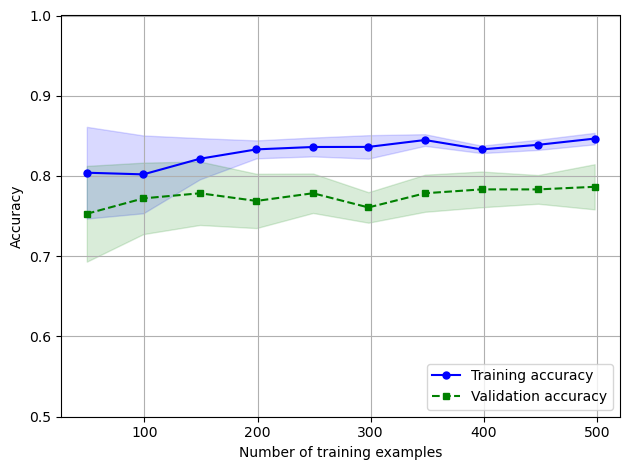

In [22]:
# kNN

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


pipe_knn = make_pipeline(StandardScaler(),
                        KNeighborsClassifier())

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_knn,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=5,
                               n_jobs=1)

#print(train_sizes)
#print(train_scores)
#print(test_scores)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

In [23]:
### kNN exhibits bias, does not coverge

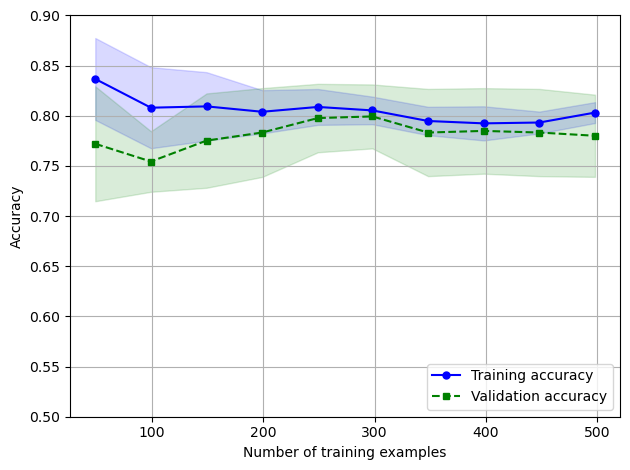

In [24]:
# SVC

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


pipe_svc = make_pipeline(StandardScaler(),
                        SVC())

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_svc,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=5,
                               n_jobs=1)

#print(train_sizes)
#print(train_scores)
#print(test_scores)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 0.9])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

In [25]:
### SVC exibits variance until the sample size reaches 300 and then begins to converge

Produce validation curves (accuracy v. hyperparameter) for both algorithms (kNN= # of neighbors, SVM=C, )

kNN # of neighbors

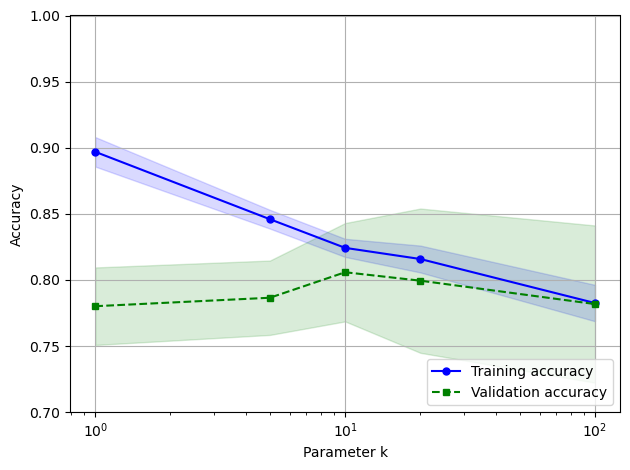

In [26]:
from sklearn.model_selection import validation_curve

param_range = [1, 5, 10, 20, 100]
train_scores, test_scores = validation_curve(
                estimator=pipe_knn, 
                X=X_train, 
                y=y_train, 
                param_name='kneighborsclassifier__n_neighbors', 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter k')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

In [27]:
### kNN optimal parameter k = 10, 

SVM C

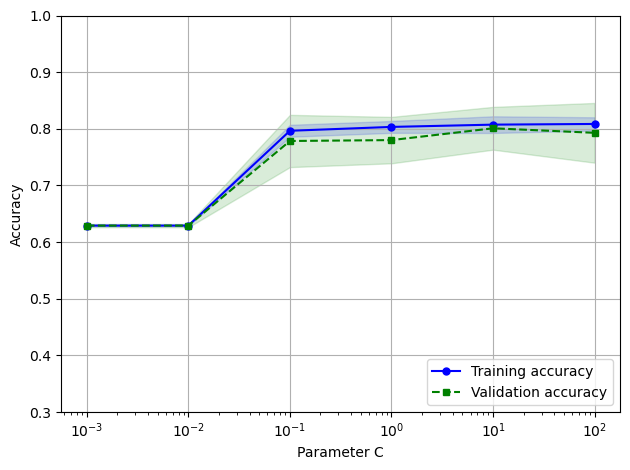

In [28]:
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_svc, 
                X=X_train, 
                y=y_train, 
                param_name='svc__C', 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()


SVC optimal parameter, C = 10
Which algorithm of the two algorithms performs better?
Both algorithms perfrom equally well (~80% accuracy), kNN is slightly better.